<a href="https://colab.research.google.com/github/kavyashree-205/IRIS_DATASET_ANALYSIS/blob/master/IRIS_DATASET_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K MEANS CLUSTERING ALGORITHM**
**The given problem statement is to find out the optimum number of clusters using unsupervised machine learning.**

# **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns

# **LOADING THE DATASET**

In [ ]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **SCATTER PLOT OF SEPAL LENGTH Vs SEPAL WIDTH**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


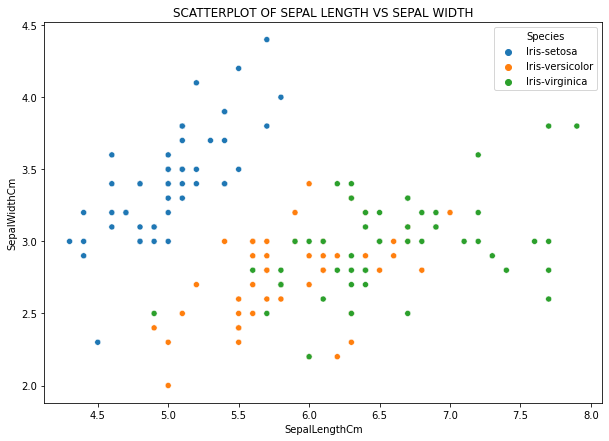

In [36]:
plt.figure(figsize=(10,7))
x='SepalLengthCm'
y='SepalWidthCm'
sns.scatterplot(x,y,data=df,hue='Species')
plt.title("SCATTERPLOT OF SEPAL LENGTH VS SEPAL WIDTH")
plt.show()


In [ ]:
colmap={1:'r',2:'b',3:'g'}

In [ ]:
df1=pd.DataFrame(data=df,columns=['SepalLengthCm','SepalWidthCm'])
df1.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


# **FINDING THE OPTIMUM NUMBER OF CLUSTERS USING ELBOW POINT METHOD**

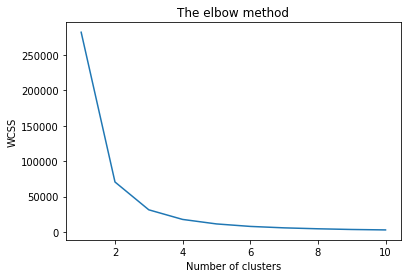

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# **FITTING DATA INTO MODEL**

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels=kmeans.predict(df1)
centroids=kmeans.cluster_centers_

# **PLOTTING CLUSTERS USING K MEANS ALGORITHM**

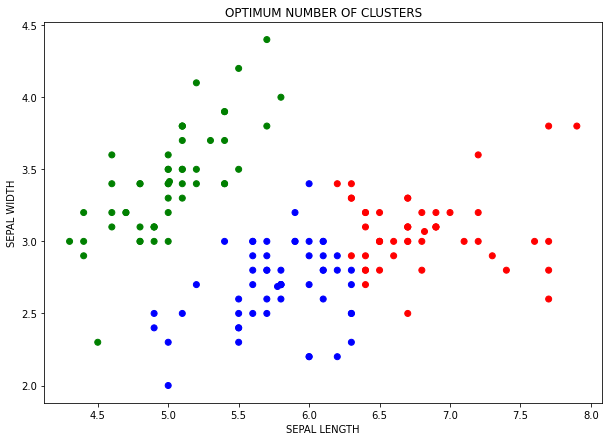

In [ ]:
plt.figure(figsize=(10,7))
plt.title("OPTIMUM NUMBER OF CLUSTERS")
plt.xlabel("SEPAL LENGTH")
plt.ylabel("SEPAL WIDTH")

x=df1['SepalLengthCm']
a=map(lambda x : colmap[x+1], labels)
colors1=list(a)
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color=colors1)
for idx,centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1])
plt.show()

